In [1]:
# Set dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

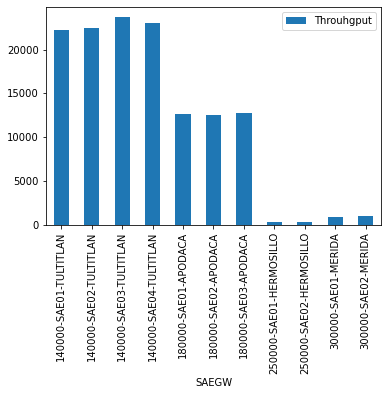

In [100]:
# Set excel paths
saegw = "files/saegw.xlsx"
saegw_bearers = "files/saegw_bearers.xlsx"
saegw_cpu = "files/saegw_cpu_mem.xlsx"

groupby_saegw = pd.read_excel(saegw).groupby(['dateday','SAEGW'])
saegw_df = groupby_saegw.max()
saegw_bearers_df = pd.read_excel(saegw_bearers)
saegw_cpu_df = pd.read_excel(saegw_cpu)

# merge and clean

merge_saegw = pd.merge(saegw_df,saegw_bearers_df, on=["dateday","SAEGW"])

merge_saegw_clean = merge_saegw[['dateday', 'SAEGW', 'LOCATION_x', 'Throuhgput', 'Maximum number of bearers']]

# Plot all SAEGW
plot_all = merge_saegw_clean.groupby(['SAEGW']).max()
plot_all.reset_index(inplace=True)
plot_all.plot.bar(x=0,y=3)

In [110]:
# Merge all saegw files
merge_saegw_all = pd.merge(merge_saegw_clean, saegw_cpu_df, on=["dateday","SAEGW"])
merge_saegw_all = merge_saegw_all[['dateday', 'SAEGW', 'LOCATION_x', 'Throuhgput', 'Maximum number of bearers', 'MAXCPUUTILIZATION','MAXMEMORYUTILIZATION']]
merge_saegw_all

,dateday,SAEGW,LOCATION_x,Throuhgput,Maximum number of bearers,MAXCPUUTILIZATION,MAXMEMORYUTILIZATION
0,2019-12-02,140000-SAE01-TULTITLAN,tultitlan,16103.67,82536,19,62
1,2019-12-02,140000-SAE01-TULTITLAN,tultitlan,16103.67,82536,21,62
2,2019-12-02,140000-SAE01-TULTITLAN,tultitlan,16103.67,82536,20,62
3,2019-12-02,140000-SAE01-TULTITLAN,tultitlan,16103.67,82536,20,62
4,2019-12-02,140000-SAE01-TULTITLAN,tultitlan,16103.67,82536,20,62
...,...,...,...,...,...,...,...
26754,2019-12-08,300000-SAE02-MERIDA,merida,924.16,1193,18,61
26755,2019-12-08,300000-SAE02-MERIDA,merida,924.16,1193,19,61
26756,2019-12-08,300000-SAE02-MERIDA,merida,924.16,1193,16,61
26757,2019-12-08,300000-SAE02-MERIDA,merida,924.16,1193,18,61


In [ ]:
# Start analysis for just SAEGW and SAEGW_Bearers

In [48]:
# Create new tables by location
tultitlan = merge_saegw_clean[merge_saegw_clean.LOCATION_x == 'tultitlan']
apodaca = merge_saegw_clean[merge_saegw_clean.LOCATION_x == 'apodaca']
hermosillo = merge_saegw_clean[merge_saegw_clean.LOCATION_x == 'hermosillo']
merida = merge_saegw_clean[merge_saegw_clean.LOCATION_x == 'merida']


In [87]:
# Create plots based on tultitlan
tult_max_saegw = tultitlan.groupby(['SAEGW']).max()
tult_max_saegw.reset_index(inplace=True)
tult_max_saegw
#tult_max_saegw.plot.bar(x=0,y=3)

,SAEGW,dateday,LOCATION_x,Throuhgput,Maximum number of bearers
0,140000-SAE01-TULTITLAN,2019-12-08,tultitlan,22271.29,83344
1,140000-SAE02-TULTITLAN,2019-12-08,tultitlan,22482.07,103604
2,140000-SAE03-TULTITLAN,2019-12-08,tultitlan,23684.76,49655
3,140000-SAE04-TULTITLAN,2019-12-08,tultitlan,23028.11,49771


In [88]:
# Create plots based on apodaca
apo_max_saegw = apodaca.groupby(['SAEGW']).max()
apo_max_saegw.reset_index(inplace=True)
apo_max_saegw
#apo_max_saegw.plot.bar(x=0,y=3)

,SAEGW,dateday,LOCATION_x,Throuhgput,Maximum number of bearers
0,180000-SAE01-APODACA,2019-12-08,apodaca,12629.97,54829
1,180000-SAE02-APODACA,2019-12-08,apodaca,12481.34,55461
2,180000-SAE03-APODACA,2019-12-08,apodaca,12772.18,25581


In [89]:
# Create plots based on hermosillo
her_max_saegw = hermosillo.groupby(['SAEGW']).max()
her_max_saegw.reset_index(inplace=True)
her_max_saegw
#her_max_saegw.plot.bar(x=0,y=3)

,SAEGW,dateday,LOCATION_x,Throuhgput,Maximum number of bearers
0,250000-SAE01-HERMOSILLO,2019-12-08,hermosillo,335.27,443
1,250000-SAE02-HERMOSILLO,2019-12-08,hermosillo,339.82,465


In [90]:
# Create plots based on merida
mer_max_saegw = merida.groupby(['SAEGW']).max()
mer_max_saegw.reset_index(inplace=True)
mer_max_saegw
#mer_max_saegw.plot.bar(x=0,y=3)

,SAEGW,dateday,LOCATION_x,Throuhgput,Maximum number of bearers
0,300000-SAE01-MERIDA,2019-12-08,merida,914.49,1210
1,300000-SAE02-MERIDA,2019-12-08,merida,924.16,1193


In [107]:
# Start analysis for ALL data "merge_saegw_all"
merge_saegw_all

,dateday,SAEGW,LOCATION_x,Throuhgput,Maximum number of bearers,LOCATION,PERIOD_START_TIME,GRANPERIOD,MCC,MNC,...,KCI,GROUPNAME,GROUP,SLOT,MDA,MAXVMFPCPUNICUSAGE,MAXVMFPCPUWORKERUSAGE,MAXVMFPCPUSCHEDULERUSAGE,MAXVMFPCPUCOLLAPSEDUSAGE,MAXVMFPCPUCOMBINEDUSAGE
0,2019-12-02,140000-SAE01-TULTITLAN,tultitlan,16103.67,82536,tultitlan,2019-12-02 00:00:00,900,334,140,...,System,CP-ISA,1,9,1,23.72,24.53,31.61,0,0
1,2019-12-02,140000-SAE01-TULTITLAN,tultitlan,16103.67,82536,tultitlan,2019-12-02 00:15:00,900,334,140,...,System,CP-ISA,1,9,1,23.37,20.02,29.70,0,0
2,2019-12-02,140000-SAE01-TULTITLAN,tultitlan,16103.67,82536,tultitlan,2019-12-02 00:30:00,900,334,140,...,System,CP-ISA,1,9,1,20.63,18.51,26.87,0,0
3,2019-12-02,140000-SAE01-TULTITLAN,tultitlan,16103.67,82536,tultitlan,2019-12-02 00:45:00,900,334,140,...,System,CP-ISA,1,9,1,18.12,15.57,22.66,0,0
4,2019-12-02,140000-SAE01-TULTITLAN,tultitlan,16103.67,82536,tultitlan,2019-12-02 01:00:00,900,334,140,...,System,CP-ISA,1,9,1,16.99,14.27,20.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26754,2019-12-08,300000-SAE02-MERIDA,merida,924.16,1193,merida,2019-12-08 22:45:00,900,334,140,...,System,CP-ISA,1,3,1,1.85,3.89,4.05,0,0
26755,2019-12-08,300000-SAE02-MERIDA,merida,924.16,1193,merida,2019-12-08 23:00:00,900,334,140,...,System,CP-ISA,1,3,1,1.74,3.54,3.70,0,0
26756,2019-12-08,300000-SAE02-MERIDA,merida,924.16,1193,merida,2019-12-08 23:15:00,900,334,140,...,System,CP-ISA,1,3,1,1.55,3.22,3.37,0,0
26757,2019-12-08,300000-SAE02-MERIDA,merida,924.16,1193,merida,2019-12-08 23:30:00,900,334,140,...,System,CP-ISA,1,3,1,1.46,2.91,3.10,0,0


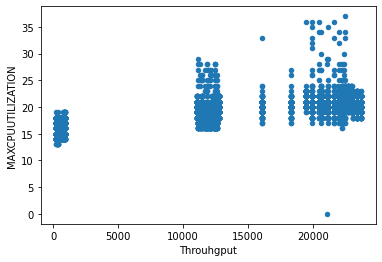

In [111]:
merge_saegw_all.plot.scatter(x=3,y=5)